<a href="https://colab.research.google.com/github/lenelise/testing-google-collab/blob/main/Day73_LEGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_color = pd.read_csv("colors.csv")
df_color.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


# <h1> Exploring the dataset of colors </h1>
---

In [ ]:
print("There are " + str(df_color.rgb.nunique()) + " unique colors in the dataset")

There are 124 unique colors in the dataset


In [ ]:
df_color.groupby("is_trans").size()

is_trans
f    107
t     28
dtype: int64

In [ ]:
df_color.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [ ]:
df_color.groupby("is_trans").size()
print("The number of transparent bricks are " + str(df_color.groupby("is_trans").size()["t"]))

The number of transparent bricks are 28


In [ ]:
df_color.is_trans.value_counts()
print("The number of transparent bricks are " + str(df_color.is_trans.value_counts()["t"]))

The number of transparent bricks are 28


# <h1>Understanding LEGO Themes vs. Lego sets </h1>

Walk into a LEGO store and you will see their products organized by theme. Their themes include Star Wars, Batman, Harry Potter and many more.



# Exploring the dataset of lego sets

In [ ]:
df_sets = pd.read_csv("sets.csv")
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
df_sets.shape

In [ ]:
idx = df_sets.year.idxmin()
minyear = df_sets.year.loc[idx]
print("The first lego set was released in year " + str(minyear))

In [ ]:
noset = df_sets.year.value_counts()[1949]
print("That year, LEGO released " + str(noset) + " number of sets. These were: ")

In [ ]:
#The sets produced in the first year:
for index in df_sets.index:
  if df_sets.year[index] == minyear:
    print(df_sets.name[index])

In [ ]:
print("the top 4 LEGO sets with the most number of parts are: ")

for idx in df_sets.num_parts.nlargest(5).index:
  print(df_sets.name[idx], df_sets.num_parts[idx])

In [ ]:
#alternatively:
df_sets.sort_values("num_parts", ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


# Visualise the number of sets published over time

In [ ]:
sets_by_year = df_sets.groupby("year").nunique()
sets_by_year["set_num"].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

In [ ]:
plt.xlabel("year")
plt.ylabel("number of sets")
plt.ylim(0,900)
plt.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2])

# Aggregate Data with agg() + plot with shared y axis

In [ ]:
themes_by_year = df_sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Number of themes')
ax2.set_ylabel('Number of sets')
ax1.set_xlabel('Year')

ax1.plot(themes_by_year.index[:-2], themes_by_year["theme_id"][:-2], color='g')
ax2.plot(sets_by_year.index[:-2], sets_by_year["set_num"][:-2])

# Scatter plots

In [ ]:
#Altfor komplisert:
sets_per_year = df_sets.groupby("year").count()
number_of_parts = df_sets.groupby("year").agg({"num_parts": pd.Series.sum})
number_of_sets = df_sets.groupby("year").count()
print(number_of_parts.shape, number_of_sets.shape)
parts_per_set = number_of_parts["num_parts"] / number_of_sets["set_num"]
parts_per_set.tail()

In [ ]:
#Losningsforslag -.-

parts_per_set = df_sets.groupby("year").agg( {"num_parts": pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


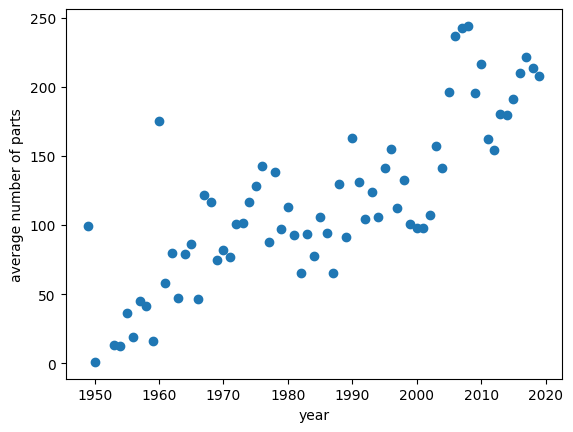

In [ ]:
plt.xlabel("year")
plt.ylabel("average number of parts")
#plt.ylim(0,900)
plt.scatter(sets_by_year.index[:-2], parts_per_set[:-2])

# Merge DataFrames and create Bar Charts

In [ ]:
df_themes = pd.read_csv("themes.csv")
df_themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [ ]:
#Number of Star Wars themes
df_themes.value_counts("name")["Star Wars"]

4

In [ ]:
id_list = []
for idx in df_themes.index:
  if df_themes.name[idx] == "Star Wars":
    id_list.append(df_themes.id[idx])

id_list

[18, 158, 209, 261]

In [ ]:
for idx in df_sets.index:
  for id in id_list:
    if df_sets.theme_id[idx] == id:
      print(df_sets.name[idx])

In [ ]:
df_sets[df_sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [ ]:
#Create series with the number of set for each theme id
set_theme_count = df_sets["theme_id"].value_counts()
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [ ]:
#create dataframe:
set_theme_count = pd.DataFrame({"id":set_theme_count.index, "set_count": set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
#merge dataframes set_theme_count and df_themes
merged_df = pd.merge(set_theme_count, df_themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [ ]:
merged_df.sort_values("id")

<BarContainer object of 10 artists>

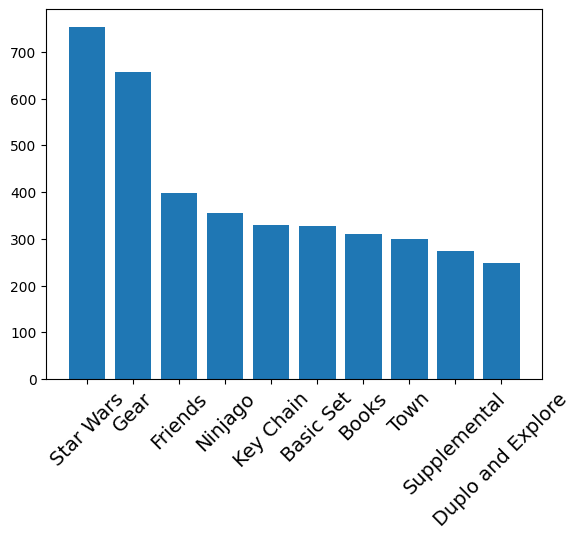

In [ ]:
plt.xticks(fontsize=14, rotation=45)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])